<h1>필요한 라이브러리와 데이터를 불러온다</h1>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf 
cf.go_offline(connected=True)

pd.options.display.float_format = '{:.5f}'.format

from sklearn.multioutput import MultiOutputRegressor
from sklearn.impute import SimpleImputer

In [2]:
import matplotlib as mpl
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.metrics import mean_absolute_error
from xgboost import plot_importance

In [4]:
shop = pd.read_excel('2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)_update_200818\\01_제공데이터\\2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터_v1_200818.xlsx', header = 1)

In [5]:
shop_t = pd.read_excel('2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)_update_200818\\02_평가데이터\\2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx', header = 1)

<h1>데이터 전처리를 해준다</h1>

In [6]:
shop.drop(shop.loc[shop['취급액'].isnull()].index, inplace = True)

In [7]:
shop_t = shop_t[shop_t['상품군'] != '무형']

In [8]:
shop.reset_index(inplace = True)
shop.drop('index', axis = 1, inplace = True)

In [9]:
shop_t.reset_index(inplace = True)
shop_t.drop('index', axis = 1, inplace = True)

In [10]:
def year_month(방송일시):
    return "{0}-{1}".format(방송일시.year, 방송일시.month)
shop['년월'] = shop['방송일시'].apply(year_month)
shop['년'] = shop['방송일시'].dt.year
shop['월'] = shop['방송일시'].dt.month
shop['일'] = shop['방송일시'].dt.day
shop['시'] = shop['방송일시'].dt.hour
shop['분'] = shop['방송일시'].dt.minute
shop['요일'] = shop['방송일시'].dt.dayofweek
shop['분기'] = shop['방송일시'].dt.quarter
shop['계절'] = 'nan'
season = ['겨울', '겨울', '봄', '봄', '봄', '여름', '여름', '여름', '가을', '가을', '가을', '겨울']
for i in range(len(shop)):
    shop['계절'].iloc[i] = season[(shop['월'].iloc[i])-1]

In [11]:
shop

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,년월,년,월,일,시,분,요일,분기,계절
0,2019-01-01 06:00:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.00000,2019-1,2019,1,1,6,0,1,1,겨울
1,2019-01-01 06:00:00,nan,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.00000,2019-1,2019,1,1,6,0,1,1,겨울
2,2019-01-01 06:20:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.00000,2019-1,2019,1,1,6,20,1,1,겨울
3,2019-01-01 06:20:00,nan,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.00000,2019-1,2019,1,1,6,20,1,1,겨울
4,2019-01-01 06:40:00,20.00000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.00000,2019-1,2019,1,1,6,40,1,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35374,2019-12-31 23:40:00,nan,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.00000,2019-12,2019,12,31,23,40,1,4,겨울
35375,2020-01-01 00:00:00,20.00000,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.00000,2020-1,2020,1,1,0,0,2,1,겨울
35376,2020-01-01 00:00:00,nan,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.00000,2020-1,2020,1,1,0,0,2,1,겨울
35377,2020-01-01 00:00:00,nan,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.00000,2020-1,2020,1,1,0,0,2,1,겨울


In [12]:
def year_month(방송일시):
    return "{0}-{1}".format(방송일시.year, 방송일시.month)
shop_t['년월'] = shop_t['방송일시'].apply(year_month)
shop_t['년'] = shop_t['방송일시'].dt.year
shop_t['월'] = shop_t['방송일시'].dt.month
shop_t['일'] = shop_t['방송일시'].dt.day
shop_t['시'] = shop_t['방송일시'].dt.hour
shop_t['분'] = shop_t['방송일시'].dt.minute
shop_t['요일'] = shop_t['방송일시'].dt.dayofweek
shop_t['분기'] = shop_t['방송일시'].dt.quarter
shop_t['계절'] = 'nan'
season = ['겨울', '겨울', '봄', '봄', '봄', '여름', '여름', '여름', '가을', '가을', '가을', '겨울']
for i in range(len(shop_t)):
    shop_t['계절'].iloc[i] = season[(shop_t['월'].iloc[i])-1]

In [13]:
shop_t

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,년월,년,월,일,시,분,요일,분기,계절
0,2020-06-01 06:20:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan,2020-6,2020,6,1,6,20,0,2,여름
1,2020-06-01 06:40:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan,2020-6,2020,6,1,6,40,0,2,여름
2,2020-06-01 07:00:00,20.00000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,nan,2020-6,2020,6,1,7,0,0,2,여름
3,2020-06-01 07:20:00,20.00000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,nan,2020-6,2020,6,1,7,20,0,2,여름
4,2020-06-01 07:40:00,20.00000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,nan,2020-6,2020,6,1,7,40,0,2,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,2020-07-01 00:10:00,10.00000,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,99000,nan,2020-7,2020,7,1,0,10,2,3,여름
2712,2020-07-01 00:10:00,nan,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,119000,nan,2020-7,2020,7,1,0,10,2,3,여름
2713,2020-07-01 00:10:00,nan,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,119000,nan,2020-7,2020,7,1,0,10,2,3,여름
2714,2020-07-01 01:20:00,20.00000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,nan,2020-7,2020,7,1,1,20,2,3,여름


<h1>데이터 시각화를 해준다</h1>

[Text(0.5, 1.0, '상품군별 평균 취급액')]

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 54217 missing from current font.

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 44512 missing from current font.

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 52712 missing from current font.

C:\Users\user\AppData\Roaming\Python\Python37\site-package

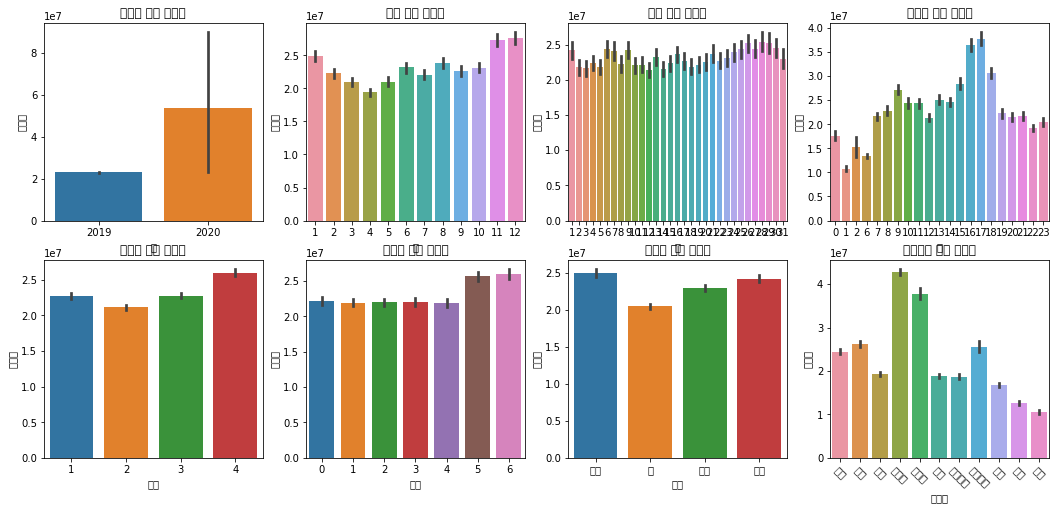

In [14]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
figure.set_size_inches(18, 8)
plt.xticks(rotation = - 45 )

plt.rc('font', family = 'Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

sns.barplot(data = shop, x = '년', y = '취급액', ax = ax1)
sns.barplot(data = shop, x = '월', y = '취급액', ax = ax2)
sns.barplot(data = shop, x = '일', y = '취급액', ax = ax3)
sns.barplot(data = shop, x = '시', y = '취급액', ax = ax4)
sns.barplot(data = shop, x = '분기', y = '취급액', ax = ax5)
sns.barplot(data = shop, x = '요일', y = '취급액', ax = ax6)
sns.barplot(data = shop, x = '계절', y = '취급액', ax = ax7)
sns.barplot(data = shop, x = '상품군', y = '취급액', ax = ax8)

ax1.set(title = '년도별 평균 취급액')
ax2.set(title = '월별 평균 취급액')
ax3.set(title = '일별 평균 취급액')
ax4.set(title = '시간별 평균 취급액')
ax5.set(title = '분기별 평균 취급액')
ax6.set(title = '요일별 평균 취급액')
ax7.set(title = '계절별 평균 취급액')
ax8.set(title = '상품군별 평균 취급액')

[Text(0.5, 1.0, '상품군별 총 취급액')]

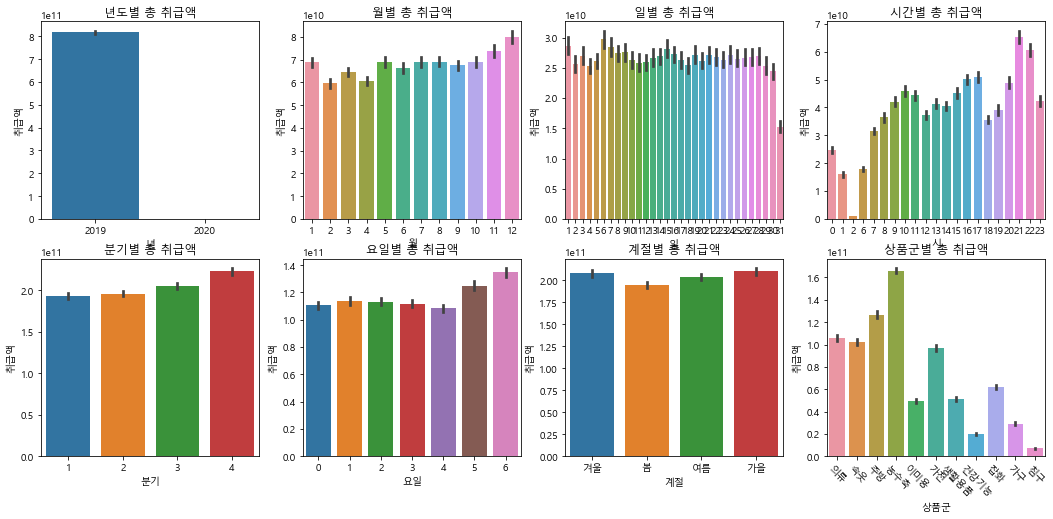

In [15]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
figure.set_size_inches(18, 8)
plt.xticks(rotation = - 45 )
sns.barplot(data = shop, x = '년', y = '취급액', estimator = sum, ax = ax1)
sns.barplot(data = shop, x = '월', y = '취급액', estimator = sum, ax = ax2)
sns.barplot(data = shop, x = '일', y = '취급액', estimator = sum, ax = ax3)
sns.barplot(data = shop, x = '시', y = '취급액', estimator = sum, ax = ax4)
sns.barplot(data = shop, x = '분기', y = '취급액', estimator = sum, ax = ax5)
sns.barplot(data = shop, x = '요일', y = '취급액', estimator = sum, ax = ax6)
sns.barplot(data = shop, x = '계절', y = '취급액', estimator = sum, ax = ax7)
sns.barplot(data = shop, x = '상품군', y = '취급액', estimator = sum, ax = ax8)

ax1.set(title = '년도별 총 취급액')
ax2.set(title = '월별 총 취급액')
ax3.set(title = '일별 총 취급액')
ax4.set(title = '시간별 총 취급액')
ax5.set(title = '분기별 총 취급액')
ax6.set(title = '요일별 총 취급액')
ax7.set(title = '계절별 총 취급액')
ax8.set(title = '상품군별 총 취급액')

In [16]:
pdt_time = shop.groupby(["시", "상품군"])[['상품군', '취급액']].sum()
pdt_time = pdt_time.reset_index(level=[0,1])
fig = px.line(pdt_time, x = '시', y = '취급액', color = '상품군')
fig.show()

In [17]:
pdt_time

,시,상품군,취급액
0,0,가구,1081895000.00000
1,0,가전,903980000.00000
2,0,건강기능,454528000.00000
3,0,농수축,485174000.00000
4,0,생활용품,2831462000.00000
...,...,...,...
209,23,의류,5220155000.00000
210,23,이미용,2103373000.00000
211,23,잡화,1627775000.00000
212,23,주방,2009354000.00000


In [18]:
pdt_group = pdt_time['상품군'].drop_duplicates()
pdt_group = list(pdt_group)
pdt_group

['가구', '가전', '건강기능', '농수축', '생활용품', '속옷', '의류', '이미용', '잡화', '주방', '침구']

In [19]:
pdt_group_re = pd.DataFrame(np.arange(22).reshape(11, 2),
                           index = pdt_group, columns = ['시', '취급액'])

In [20]:
pdt_idx = []

In [21]:
for i in range(len(pdt_group)):
    pdt_idx.append(pdt_time[pdt_time['상품군']==pdt_group[i]].취급액.idxmax())

In [22]:
pdt_idx

[181, 182, 44, 145, 175, 166, 68, 110, 80, 132, 103]

In [23]:
for i in range(len(pdt_idx)):
    pdt_group_re.loc[pdt_group[i], ['시']] = pdt_time.iloc[pdt_idx[i]].시
    pdt_group_re.loc[pdt_group[i], ['취급액']] = pdt_time.iloc[pdt_idx[i]].취급액

In [24]:
fig = px.bar(pdt_group_re, x = '시', y = '취급액', color = pdt_group_re.index)
fig.show()

In [25]:
pdt_hour = pdt_time['시'].drop_duplicates()
pdt_hour = list(pdt_hour)
pdt_hour

[0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [26]:
pdt_group_time = pd.DataFrame(np.arange(42).reshape(21, 2),
                           index = pdt_hour, columns = ['상품군', '취급액'])
pdt_group_time

,상품군,취급액
0,0,1
1,2,3
2,4,5
6,6,7
7,8,9
8,10,11
9,12,13
10,14,15
11,16,17
12,18,19


In [27]:
pdt_idx1 = []
for n in pdt_hour:
    pdt_idx1.append(pdt_time[pdt_time['시']==n].취급액.idxmax())
pdt_idx1

[5,
 16,
 28,
 37,
 48,
 58,
 68,
 81,
 85,
 102,
 112,
 122,
 132,
 136,
 145,
 154,
 166,
 172,
 182,
 193,
 204]

In [28]:
for i in range(len(pdt_idx1)):
    pdt_group_time.iloc[i, 0] = pdt_time.iloc[pdt_idx1[i]].상품군
    pdt_group_time.iloc[i, 1] = pdt_time.iloc[pdt_idx1[i]].취급액
pdt_group_time

,상품군,취급액
0,속옷,6864607000.00000
1,속옷,4202392000.00000
2,이미용,231643000.00000
6,의류,5341645000.00000
7,의류,8754229000.00000
8,의류,10580369000.00000
9,의류,12203216000.00000
10,주방,9683624000.00000
11,농수축,10515826000.00000
12,주방,10418813000.00000


In [29]:
fig = px.bar(pdt_group_time, x = pdt_group_time.index, y = '취급액', color = '상품군')
fig.show()

In [30]:
fig = px.pie(pdt_group_re, names = pdt_group_re.index, values = '취급액')
fig.show()

In [31]:
pdt_time_m = shop.groupby(["시", "상품군"])[['상품군', '취급액']].mean()
pdt_time_m = pdt_time_m.reset_index(level=[0,1])
fig = px.line(pdt_time_m, x = '시', y = '취급액', color = '상품군')
fig.show()

In [32]:
pdt_idxm = []

In [33]:
for i in range(len(pdt_group)):
    pdt_idxm.append(pdt_time_m[pdt_time_m['상품군']==pdt_group[i]].취급액.idxmax())

In [34]:
pdt_idxm

[52, 152, 194, 3, 165, 186, 148, 188, 169, 142, 202]

In [35]:
pdt_group_m = pd.DataFrame(np.arange(22).reshape(11, 2),
                           index = pdt_group, columns = ['시', '취급액'])
for i in range(len(pdt_idxm)):
    pdt_group_m.loc[pdt_group[i], ['시']] = pdt_time_m.iloc[pdt_idxm[i]].시
    pdt_group_m.loc[pdt_group[i], ['취급액']] = pdt_time_m.iloc[pdt_idxm[i]].취급액
pdt_group_m

,시,취급액
가구,8,16683600.00000
가전,18,36333500.00000
건강기능,22,45027000.00000
농수축,0,80862333.33333
생활용품,19,30052742.13836
속옷,21,41439890.10989
의류,17,44706133.33333
이미용,21,80054878.78788
잡화,19,30721800.00000
주방,16,26459443.39623


In [36]:
fig = px.bar(pdt_group_m, x = '시', y = '취급액', color = pdt_group_m.index)
fig.show()

In [37]:
pdt_group_time_m = pd.DataFrame(np.arange(42).reshape(21, 2),
                           index = pdt_hour, columns = ['상품군', '취급액'])
pdt_group_time_m

,상품군,취급액
0,0,1
1,2,3
2,4,5
6,6,7
7,8,9
8,10,11
9,12,13
10,14,15
11,16,17
12,18,19


In [38]:
pdt_idxm1 = []
for n in pdt_hour:
    pdt_idxm1.append(pdt_time_m[pdt_time_m['시']==n].취급액.idxmax())
pdt_idxm1

[3,
 14,
 24,
 36,
 49,
 59,
 69,
 79,
 89,
 96,
 110,
 120,
 130,
 140,
 145,
 154,
 168,
 178,
 188,
 199,
 206]

In [39]:
for i in range(len(pdt_idxm1)):
    pdt_group_time_m.iloc[i, 0] = pdt_time_m.iloc[pdt_idxm1[i]].상품군
    pdt_group_time_m.iloc[i, 1] = pdt_time_m.iloc[pdt_idxm1[i]].취급액
pdt_group_time_m

,상품군,취급액
0,농수축,80862333.33333
1,농수축,17677833.33333
2,농수축,24353000.00000
6,속옷,15686116.75127
7,이미용,28817177.21519
8,이미용,39757712.32877
9,이미용,41901977.01149
10,이미용,53249973.68421
11,이미용,43434458.33333
12,농수축,39246520.83333


In [40]:
fig = px.bar(pdt_group_time_m, x = pdt_group_time_m.index, y = '취급액', color = '상품군')
fig.show()

In [41]:
fig = px.pie(pdt_group_m, names = pdt_group_m.index, values = '취급액')
fig.show()

<h1>노출(분) 컬럼의 결측치를 같은 방송일시를 가진 값의 노출(분) 값과 같게 만들어준다</h1>

In [42]:
shop_t.replace([np.nan], [0], inplace = True)
shop['노출(분)'].value_counts()

20.00000    18094
30.00000      977
10.00000      753
15.00000      117
30.10000       89
            ...  
17.08333        1
14.70000        1
6.66667         1
12.00000        1
27.08333        1
Name: 노출(분), Length: 101, dtype: int64

In [43]:
shop_t['노출(분)'] = shop_t['노출(분)'].round(0).astype(int)

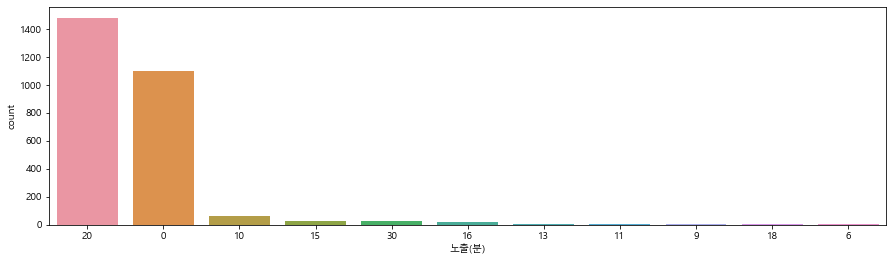

In [44]:
plt.figure(figsize = (15, 4))
sns.countplot(shop_t['노출(분)'], order = shop_t['노출(분)'].value_counts().index)

In [45]:
grouped_t = shop_t['노출(분)'].groupby(shop_t['방송일시']).max()
grouped_t

방송일시
2020-06-01 06:20:00    20
2020-06-01 06:40:00    20
2020-06-01 07:00:00    20
2020-06-01 07:20:00    20
2020-06-01 07:40:00    20
                       ..
2020-06-30 23:50:00    10
2020-07-01 00:00:00    10
2020-07-01 00:10:00    10
2020-07-01 01:20:00    20
2020-07-01 01:40:00    16
Name: 노출(분), Length: 1617, dtype: int32

In [46]:
for i in range(len(shop_t)):
    if shop_t.iloc[i]['노출(분)'] == 0:
        if grouped_t[shop_t['방송일시'][i]] != 0:
            shop_t.iloc[i, shop_t.columns.get_loc('노출(분)')] = grouped_t[shop_t['방송일시'][i]]
        else:
            shop_t.iloc[i, shop_t.columns.get_loc('노출(분)')] = 20

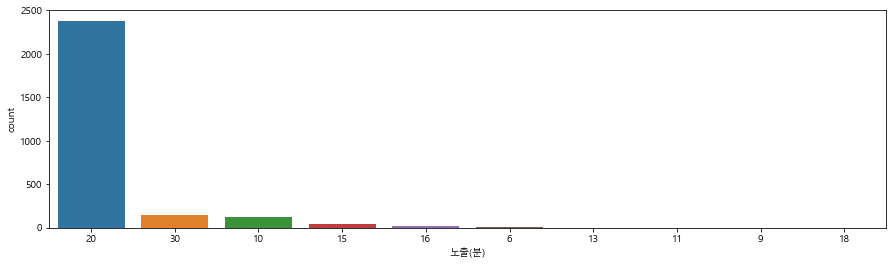

In [47]:
plt.figure(figsize = (15, 4))
sns.countplot(shop_t['노출(분)'], order = shop_t['노출(분)'].value_counts().index)

In [48]:
shop.replace([np.nan], [0], inplace = True)

In [49]:
shop['노출(분)'].value_counts()

20.00000    18094
0.00000     14976
30.00000      977
10.00000      753
15.00000      117
            ...  
11.03333        1
17.08333        1
26.08333        1
6.66667         1
27.08333        1
Name: 노출(분), Length: 102, dtype: int64

In [50]:
shop['노출(분)'] = shop['노출(분)'].round(0).astype(int)

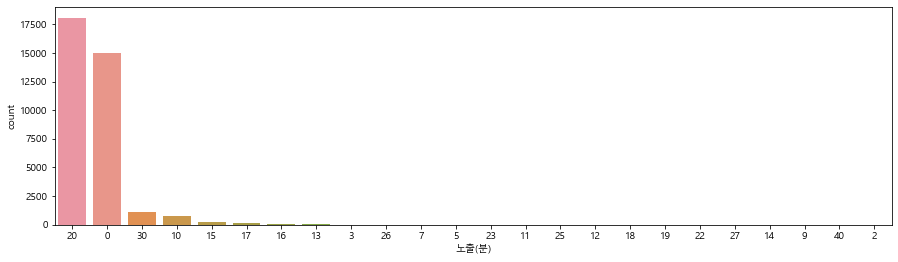

In [51]:
plt.figure(figsize = (15, 4))
sns.countplot(shop['노출(분)'], order = shop['노출(분)'].value_counts().index)

In [52]:
grouped = shop['노출(분)'].groupby(shop['방송일시']).max()
grouped

방송일시
2019-01-01 06:00:00    20
2019-01-01 06:20:00    20
2019-01-01 06:40:00    20
2019-01-01 07:00:00    20
2019-01-01 07:20:00    20
                       ..
2019-12-31 21:40:00    20
2019-12-31 22:00:00    20
2019-12-31 23:20:00    20
2019-12-31 23:40:00    20
2020-01-01 00:00:00    20
Name: 노출(분), Length: 20566, dtype: int32

In [53]:
for i in range(len(shop)):
    if shop.iloc[i]['노출(분)'] == 0:
        if grouped[shop['방송일시'][i]] != 0:
            shop.iloc[i, shop.columns.get_loc('노출(분)')] = grouped[shop['방송일시'][i]]
        else:
            shop.iloc[i, shop.columns.get_loc('노출(분)')] = 20

In [54]:
shop['노출(분)'].mean()

20.322253314112892

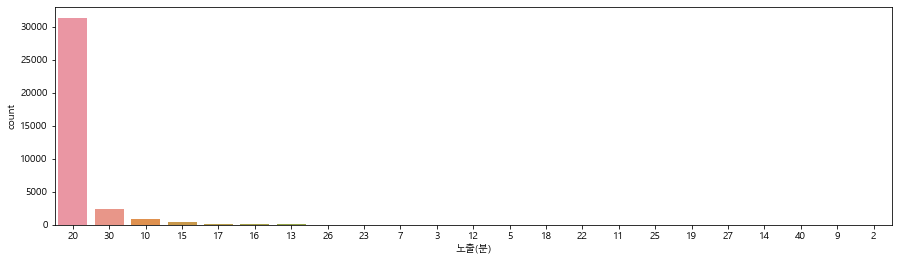

In [55]:
plt.figure(figsize = (15, 4))
sns.countplot(shop['노출(분)'], order = shop['노출(분)'].value_counts().index)

<h1>히트맵으로 컬럼들의 상관관계를 파악한다</h1>

In [56]:
corrMatt = shop[['노출(분)', '마더코드', '상품코드', '상품군', '판매단가', '취급액', '월', '일', '시', '요일', '분기', '계절']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

         노출(분)     마더코드     상품코드     판매단가      취급액        월        일        시  \
노출(분)  1.00000  0.08812  0.07998  0.12489  0.05062 -0.04485 -0.01061 -0.00486   
마더코드   0.08812  1.00000  0.97793 -0.20565 -0.05436 -0.08585  0.01708 -0.09945   
상품코드   0.07998  0.97793  1.00000 -0.21711 -0.04181 -0.10200  0.01245 -0.10122   
판매단가   0.12489 -0.20565 -0.21711  1.00000 -0.16154 -0.04423 -0.06304  0.33290   
취급액    0.05062 -0.05436 -0.04181 -0.16154  1.00000  0.06820  0.02786  0.07853   
월     -0.04485 -0.08585 -0.10200 -0.04423  0.06820  1.00000  0.00307 -0.00583   
일     -0.01061  0.01708  0.01245 -0.06304  0.02786  0.00307  1.00000 -0.00929   
시     -0.00486 -0.09945 -0.10122  0.33290  0.07853 -0.00583 -0.00929  1.00000   
요일    -0.00633 -0.03427 -0.03453  0.06454  0.06672 -0.01575  0.00952 -0.00446   
분기    -0.04204 -0.08478 -0.09970 -0.04140  0.06354  0.97038  0.00404 -0.00326   

            요일       분기  
노출(분) -0.00633 -0.04204  
마더코드  -0.03427 -0.08478  
상품코드  -0.03453 -0.09970  
판매단가

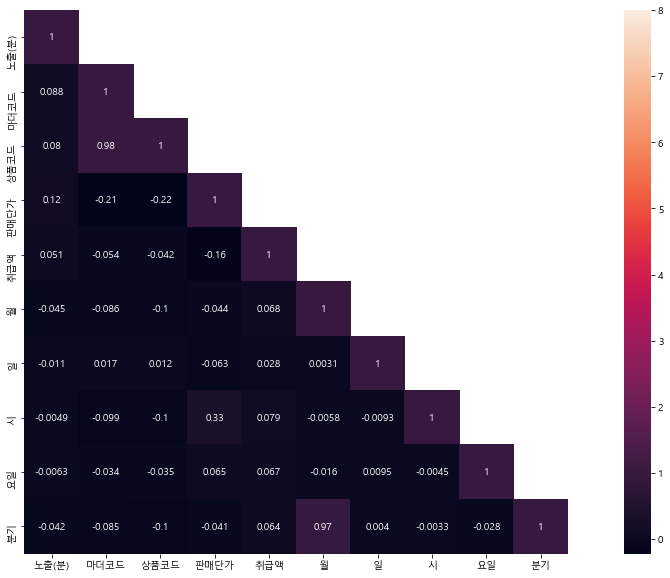

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask = mask, vmax = 8, square = True, annot = True)

<h1>모델을 이용하여 평가 데이터를 예측한다</h1>

In [58]:
X_train = shop[['월', '요일', '시', '일', '노출(분)']]
y_train = shop['취급액']

In [59]:
X_train

,월,요일,시,일,노출(분)
0,1,1,6,1,20
1,1,1,6,1,20
2,1,1,6,1,20
3,1,1,6,1,20
4,1,1,6,1,20
...,...,...,...,...,...
35374,12,1,23,31,20
35375,1,2,0,1,20
35376,1,2,0,1,20
35377,1,2,0,1,20


In [60]:
y_train

0         2099000.00000
1         4371000.00000
2         3262000.00000
3         6955000.00000
4         6672000.00000
              ...      
35374    10157000.00000
35375    50929000.00000
35376   104392000.00000
35377    13765000.00000
35378    46608000.00000
Name: 취급액, Length: 35379, dtype: float64

In [61]:
model = XGBRegressor(n_estimators = 20000)
model.fit(X_train, y_train)
pred = model.predict(X_train)

In [62]:
pred

array([ 5449456.,  5449456.,  5449456., ..., 53923300., 53923300.,
       53923300.], dtype=float32)

In [63]:
mae = mean_absolute_error(y_train, pred)
mae

8882028.232532011

In [64]:
test = shop_t[['월', '요일', '시', '일', '노출(분)']]

In [65]:
test

,월,요일,시,일,노출(분)
0,6,0,6,1,20
1,6,0,6,1,20
2,6,0,7,1,20
3,6,0,7,1,20
4,6,0,7,1,20
...,...,...,...,...,...
2711,7,2,0,1,10
2712,7,2,0,1,10
2713,7,2,0,1,10
2714,7,2,1,1,20


In [66]:
pred_t = model.predict(test)
pred_t

array([ 6834309.5,  6834309.5, 19716094. , ..., 34662440. , 12382730. ,
       14809968. ], dtype=float32)

In [67]:
pred_t = pd.DataFrame(pred_t)

In [68]:
pred_t1 = pd.concat([shop_t, pred_t], axis=1)

In [69]:
pred_t1.rename(columns = {0: '예측값'}, inplace = True)

In [70]:
pred_t1

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,년월,년,월,일,시,분,요일,분기,계절,예측값
0,2020-06-01 06:20:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,0.00000,2020-6,2020,6,1,6,20,0,2,여름,6834309.50000
1,2020-06-01 06:40:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,0.00000,2020-6,2020,6,1,6,40,0,2,여름,6834309.50000
2,2020-06-01 07:00:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,0.00000,2020-6,2020,6,1,7,0,0,2,여름,19716094.00000
3,2020-06-01 07:20:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,0.00000,2020-6,2020,6,1,7,20,0,2,여름,19716094.00000
4,2020-06-01 07:40:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,0.00000,2020-6,2020,6,1,7,40,0,2,여름,19716094.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,2020-07-01 00:10:00,10,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,99000,0.00000,2020-7,2020,7,1,0,10,2,3,여름,34662440.00000
2712,2020-07-01 00:10:00,10,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,119000,0.00000,2020-7,2020,7,1,0,10,2,3,여름,34662440.00000
2713,2020-07-01 00:10:00,10,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,119000,0.00000,2020-7,2020,7,1,0,10,2,3,여름,34662440.00000
2714,2020-07-01 01:20:00,20,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,0.00000,2020-7,2020,7,1,1,20,2,3,여름,12382730.00000


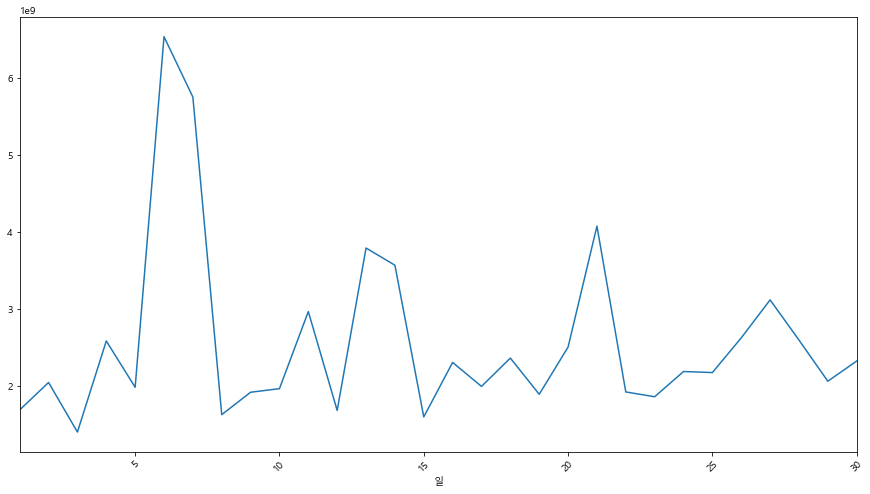

In [71]:
plt.figure(figsize = (15,8))
pred_t1['예측값'].groupby(pred_t1['일']).sum().plot(rot=45)

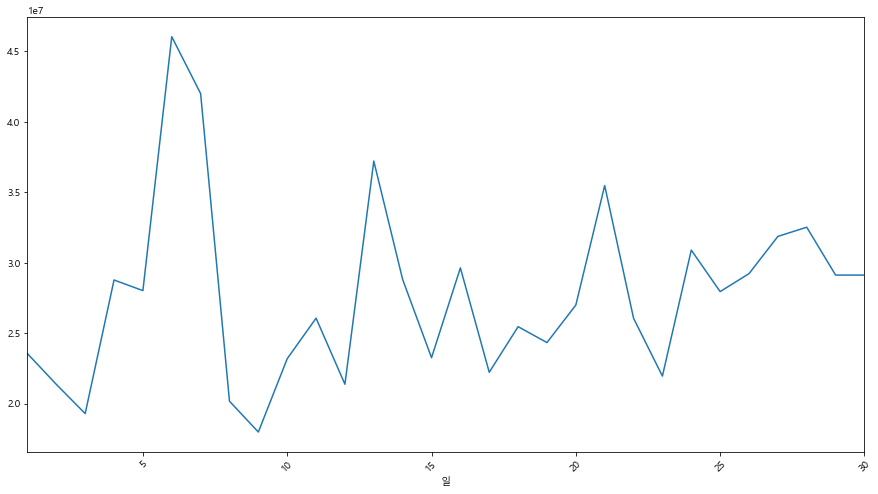

In [72]:
plt.figure(figsize = (15,8))
pred_t1['예측값'].groupby(pred_t1['일']).mean().plot(rot=45)

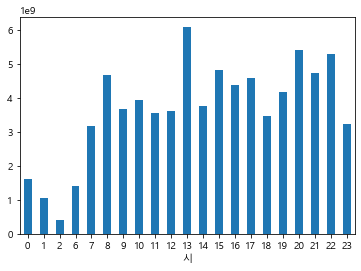

In [73]:
pred_t1['예측값'].groupby(pred_t1['시']).sum().plot.bar(rot=0)

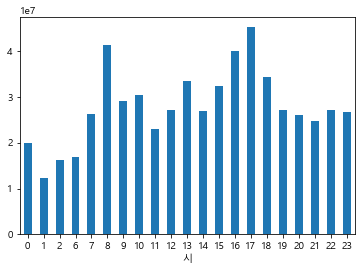

In [74]:
pred_t1['예측값'].groupby(pred_t1['시']).mean().plot.bar(rot=0)

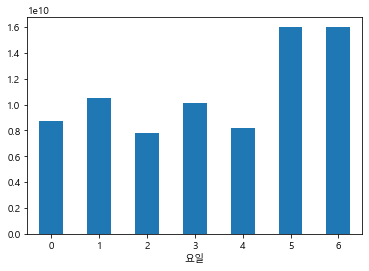

In [75]:
pred_t1['예측값'].groupby(pred_t1['요일']).sum().plot.bar(rot=0)

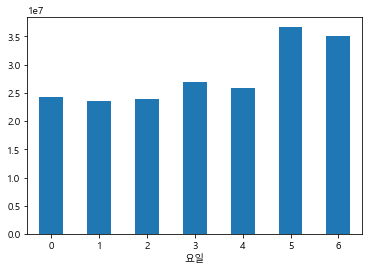

In [76]:
pred_t1['예측값'].groupby(pred_t1['요일']).mean().plot.bar(rot=0)

In [77]:
fscore = model.get_booster().get_fscore()
fscore

{'시': 401229, '월': 231708, '노출(분)': 37686, '일': 342645, '요일': 162442}

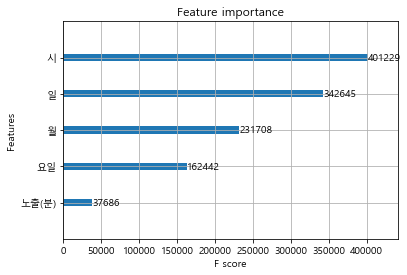

In [78]:
plot_importance(model)

In [79]:
pdt_time_t = pred_t1.groupby(["시", "상품군"])[['상품군', '예측값']].sum()
pdt_time_t = pdt_time_t.reset_index(level=[0,1])
fig = px.line(pdt_time_t, x = '시', y = '예측값', color = '상품군')
fig.show()

In [80]:
pdt_group_re_t = pd.DataFrame(np.arange(22).reshape(11, 2),
                           index = pdt_group, columns = ['시', '예측값'])

In [81]:
idx_t = []

In [82]:
for i in range(len(pdt_group)):
    idx_t.append(pdt_time_t[pdt_time_t['상품군']==pdt_group[i]].예측값.idxmax())

In [83]:
idx_t

[140, 157, 116, 117, 81, 144, 33, 93, 85, 43, 96]

In [84]:
for i in range(len(idx_t)):
    pdt_group_re_t.loc[pdt_group[i], ['시']] = pdt_time_t.iloc[idx_t[i]].시
    pdt_group_re_t.loc[pdt_group[i], ['예측값']] = pdt_time_t.iloc[idx_t[i]].예측값

In [85]:
fig = px.bar(pdt_group_re_t,  x = '시', y = '예측값', color = pdt_group_re_t.index)
fig.show()

In [86]:
pdt_group_time_t = pd.DataFrame(np.arange(42).reshape(21, 2),
                           index = pdt_hour, columns = ['상품군', '예측값'])
pdt_group_time_t

,상품군,예측값
0,0,1
1,2,3
2,4,5
6,6,7
7,8,9
8,10,11
9,12,13
10,14,15
11,16,17
12,18,19


In [87]:
idx_t1 = []
for n in pdt_hour:
    idx_t1.append(pdt_time_t[pdt_time_t['시']==n].예측값.idxmax())
idx_t1

[3,
 11,
 19,
 27,
 35,
 42,
 46,
 55,
 63,
 71,
 85,
 88,
 103,
 107,
 117,
 125,
 135,
 141,
 150,
 157,
 165]

In [88]:
for i in range(len(idx_t1)):
    pdt_group_time_t.iloc[i, 0] = pdt_time_t.iloc[idx_t1[i]].상품군
    pdt_group_time_t.iloc[i, 1] = pdt_time_t.iloc[idx_t1[i]].예측값
pdt_group_time_t

,상품군,예측값
0,생활용품,399018496.00000
1,의류,321953920.00000
2,잡화,125193200.00000
6,잡화,283300160.00000
7,잡화,1001031616.00000
8,잡화,1808013824.00000
9,농수축,1325986560.00000
10,농수축,1035561536.00000
11,가전,762818304.00000
12,가전,881627712.00000


In [89]:
fig = px.bar(pdt_group_time_t, x = pdt_group_time_t.index, y = '예측값', color = '상품군')
fig.show()

In [90]:
pdt_time_tm = pred_t1.groupby(["시", "상품군"])[['상품군', '예측값']].mean()
pdt_time_tm = pdt_time_tm.reset_index(level=[0,1])
fig = px.line(pdt_time_tm, x = '시', y = '예측값', color = '상품군')
fig.show()

In [91]:
pdt_group_re_m = pd.DataFrame(np.arange(22).reshape(11, 2),
                           index = pdt_group, columns = ['시', '예측값'])

In [92]:
idx_m = []

In [93]:
for i in range(len(pdt_group)):
    idx_m.append(pdt_time_tm[pdt_time_tm['상품군']==pdt_group[i]].예측값.idxmax())

In [94]:
idx_m

[53, 71, 116, 107, 118, 119, 110, 120, 42, 43, 96]

In [95]:
for i in range(len(idx_m)):
    pdt_group_re_m.loc[pdt_group[i], ['시']] = pdt_time_tm.iloc[idx_t[i]].시
    pdt_group_re_m.loc[pdt_group[i], ['예측값']] = pdt_time_tm.iloc[idx_t[i]].예측값

In [96]:
fig = px.bar(pdt_group_re_m,  x = '시', y = '예측값', color = pdt_group_re_m.index)
fig.show()

In [97]:
pdt_group_time_tm = pd.DataFrame(np.arange(42).reshape(21, 2),
                           index = pdt_hour, columns = ['상품군', '예측값'])
pdt_group_time_tm

,상품군,예측값
0,0,1
1,2,3
2,4,5
6,6,7
7,8,9
8,10,11
9,12,13
10,14,15
11,16,17
12,18,19


In [98]:
idx_tm1 = []
for n in pdt_hour:
    idx_tm1.append(pdt_time_tm[pdt_time_tm['시']==n].예측값.idxmax())
idx_tm1

[6,
 8,
 19,
 26,
 36,
 42,
 45,
 54,
 66,
 71,
 85,
 88,
 103,
 110,
 120,
 126,
 138,
 145,
 150,
 159,
 167]

In [99]:
for i in range(len(idx_tm1)):
    pdt_group_time_tm.iloc[i, 0] = pdt_time_tm.iloc[idx_tm1[i]].상품군
    pdt_group_time_tm.iloc[i, 1] = pdt_time_tm.iloc[idx_tm1[i]].예측값
pdt_group_time_tm

,상품군,예측값
0,이미용,24396998.00000
1,농수축,17562510.00000
2,잡화,25038640.00000
6,이미용,20905192.00000
7,주방,36517820.00000
8,잡화,75333912.00000
9,가전,37758924.00000
10,가전,34817304.00000
11,속옷,32169534.00000
12,가전,41982272.00000


In [100]:
fig = px.bar(pdt_group_time_tm, x = pdt_group_time_tm.index, y = '예측값', color = '상품군')
fig.show()